# SocialMideaConduct 2 社交媒体数据-切割+聚类模块

## 2.0 预制模块

In [4]:
import pandas as pd
import numpy as np

AttributeError: partially initialized module 'pandas' has no attribute 'plotting' (most likely due to a circular import)

## 2.1 社交媒体数据切割技术

### 原始的10w+量数据集说明
module: dataSpilt

In [1]:
import dataSplit
data = pd.read_csv("results/random-nuclear/Res-Dat/processed-content-data.csv")
data

NameError: name 'pd' is not defined

In [5]:
dataSplit.dataRandom("results/random-nuclear/Res-Dat/processed-content-data.csv", "results/random-nuclear/Res-Random-Data/allnuclearRandom.csv")

In [6]:
dataSplit.splitByLineCount("results/random-nuclear/Res-Random-Data/allnuclearRandom.csv", 20185)

make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_1.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_2.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_3.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_4.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_5.csv


可以看到随机生成了10个csv格式的子文件，我们可以尝试对这些子文件进行后续的操作，比如聚类等等算法，
避免因为数据量太大导致降维超出内存等的问题。

接下来我们可以实现遍历csv进行相关的降维等等操作了

我们定义一个列表放置所有的生成文件

## 2.2 评论类数据降维考察

相关内容封装在dataCluster.py模块里面了

In [7]:
lister = []
for i in range(5):
    lister.append("allnuclearRandom_"+str(i+1)+".csv")

lister

['allnuclearRandom_1.csv',
 'allnuclearRandom_2.csv',
 'allnuclearRandom_3.csv',
 'allnuclearRandom_4.csv',
 'allnuclearRandom_5.csv']

In [ ]:
dataEXP = pd.read_csv('results/random-nuclear/Res-Random-Data/'+lister[0])

import dataCluster
clster = dataCluster.DataCluster(dataEXP,'nuclear-random-0')
clster.generate_wordcountvector()
clster.pca_2()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.639 seconds.
Prefix dict has been built successfully.
F:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'a', 'ain', 'aren', 'c', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'i', 'isn', 'll', 'm', 'mon', 's', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn', '下', '不', '为什', '什', '今', '使', '先', '却', '只', '唷', '啪', '喔', '天', '好', '後', '最', '漫', '然', '特', '特别', '见', '设', '说', '达', '面', '麽', '－'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,pca_x,pca_y
0,0.175174,0.223086
1,0.536350,0.254874
2,-1.625357,0.476958
3,1.789488,-2.015527
4,-0.136076,0.377777
...,...,...
20180,-0.318698,0.636576
20181,-0.952821,0.522384
20182,-1.661143,0.239877
20183,-0.830718,0.222679


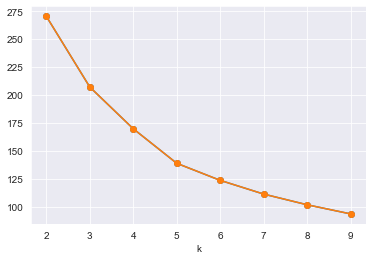

In [12]:
clster.cluster_comment()

轮廓系数可以用来选择合适的聚类数目。根据折线图可直观的找到系数变化幅度最大的点，认为发生畸变幅度最大的点就是最好的聚类数目。
上图显示，聚类成5类效果最优。

In [ ]:
dataEXP = pd.read_csv('results/random-nuclear/Res-Random-Data/'+lister[1])

import dataCluster
clster_1 = dataCluster.DataCluster(dataEXP,'nuclear-random-1')
clster_1.generate_wordcountvector()
clster_1.pca_2()

F:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'a', 'ain', 'aren', 'c', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'i', 'isn', 'll', 'm', 'mon', 's', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn', '下', '不', '为什', '什', '今', '使', '先', '却', '只', '唷', '啪', '喔', '天', '好', '後', '最', '漫', '然', '特', '特别', '见', '设', '说', '达', '面', '麽', '－'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [ ]:
clster_1.cluster_comment()